In [1]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
from sklearn.datasets import make_moons

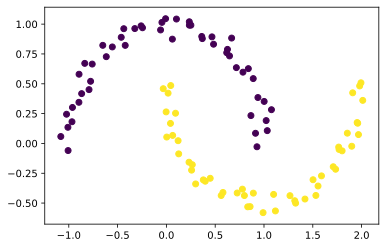

In [2]:
moons=make_moons(n_samples=100, shuffle=True, noise=0.05)
plt.scatter(moons[0][:,0], moons[0][:,1], c=moons[1])

# DBSCAN

In [3]:
from sklearn.cluster import DBSCAN

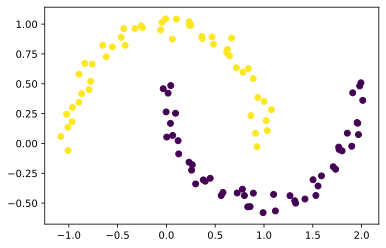

In [4]:
dbscan=DBSCAN(eps=0.25)
dbscan.fit(moons[0])
plt.scatter(moons[0][:,0], moons[0][:,1], c=dbscan.labels_);

# HDBSCAN

In [5]:
from hdbscan import HDBSCAN

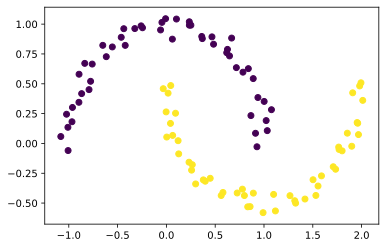

In [6]:
hdbscan=HDBSCAN(gen_min_span_tree=True)
hdbscan.fit(moons[0])
plt.scatter(moons[0][:,0], moons[0][:,1], c=hdbscan.labels_);

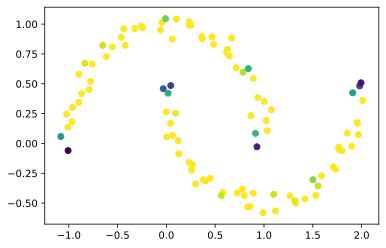

In [7]:
plt.scatter(moons[0][:,0], moons[0][:,1], c=hdbscan.probabilities_);

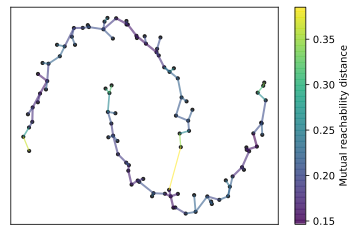

In [8]:
hdbscan.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                    edge_alpha=0.6, 
                                    node_size=10,
                                    edge_linewidth=1.2);

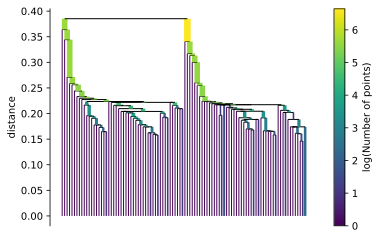

In [9]:
hdbscan.single_linkage_tree_.plot(cmap='viridis', colorbar=True);

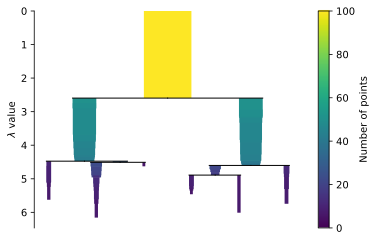

In [10]:
hdbscan.condensed_tree_.plot()

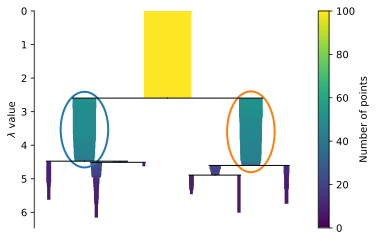

In [11]:
import seaborn as sns

hdbscan.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette());

# OPTICS

In [12]:
from sklearn.cluster import OPTICS

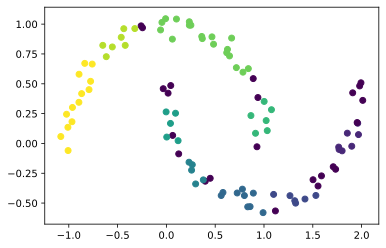

In [15]:
opt=OPTICS(max_eps=0.5)
opt.fit(moons[0])
plt.scatter(moons[0][:,0], moons[0][:,1], c=opt.labels_);

# GMM

In [16]:
from sklearn.mixture import GaussianMixture

gm=GaussianMixture(n_components=2, covariance_type='full')
gm.fit(moons[0])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [17]:
gm.means_

array([[ 1.14293639, -0.1365276 ],
       [-0.13851717,  0.62730092]])

In [18]:
gm.covariances_

array([[[0.34659408, 0.06432939],
        [0.06432939, 0.09847836]],

       [[0.34924393, 0.06623387],
        [0.06623387, 0.10319775]]])

In [19]:
gm.predict_proba(moons[0])[0:5]

array([[9.97117418e-01, 2.88258201e-03],
       [9.99908031e-01, 9.19693548e-05],
       [5.42386237e-06, 9.99994576e-01],
       [1.33738815e-04, 9.99866261e-01],
       [4.83162385e-05, 9.99951684e-01]])

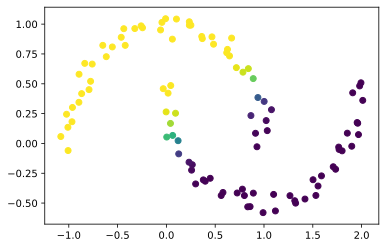

In [20]:
plt.scatter(moons[0][:,0], moons[0][:,1], c=gm.predict_proba(moons[0])[:,1]);

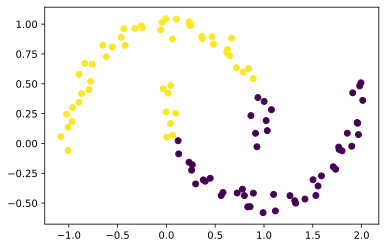

In [21]:
plt.scatter(moons[0][:,0], moons[0][:,1], c=gm.predict(moons[0]));

In [22]:
from sklearn.datasets import make_classification

In [23]:
X=make_classification(n_features=2, n_redundant=0, n_informative=2,
                      n_clusters_per_class=1)

gm=GaussianMixture(n_components=2, covariance_type='full')
gm.fit(X[0]);

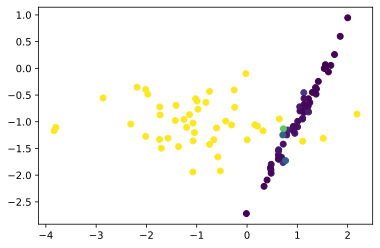

In [24]:
plt.scatter(X[0][:,0], X[0][:,1], c=gm.predict_proba(X[0])[:,1]);

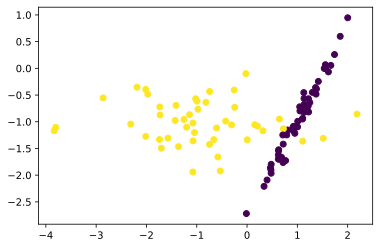

In [25]:
plt.scatter(X[0][:,0], X[0][:,1], c=gm.predict(X[0]));

# Leccion guiada

In [26]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
import pandas as pd
import seaborn as sns
import numpy as np

In [27]:
breadbasket=pd.read_csv('data/breadbasket_dms.csv')
breadbasket.head()

Date      Time  Transaction           Item
0  2016-10-30  09:58:11            1          Bread
1  2016-10-30  10:05:34            2   Scandinavian
2  2016-10-30  10:05:34            2   Scandinavian
3  2016-10-30  10:07:57            3  Hot chocolate
4  2016-10-30  10:07:57            3            Jam

In [29]:
breadbasket.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 4.1 MB


In [30]:
breadbasket.describe()

Transaction
count  21293.000000
mean    4951.990889
std     2787.758400
min        1.000000
25%     2548.000000
50%     5067.000000
75%     7329.000000
max     9684.000000

In [31]:
breadbasket['Datetime']=pd.to_datetime(breadbasket.Date+' '+breadbasket.Time,
                                       format='%Y-%m-%d %H:%M:%S')
breadbasket.head()

Date      Time  Transaction           Item            Datetime
0  2016-10-30  09:58:11            1          Bread 2016-10-30 09:58:11
1  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34
2  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34
3  2016-10-30  10:07:57            3  Hot chocolate 2016-10-30 10:07:57
4  2016-10-30  10:07:57            3            Jam 2016-10-30 10:07:57

In [32]:
breadbasket.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [33]:
breadbasket.Item.nunique()

95

In [34]:
breadbasket.Item.value_counts().nlargest(10)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Name: Item, dtype: int64

In [35]:
beverage = ['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies']
other = ['NONE', 'Christmas common', 'Gift voucher', "Valentine's card", 'Tshirt', 'Afternoon with the baker', 'Postcard', 'Siblings', 'Nomad bag', 'Adjustment', 'Drinking chocolate spoons ', 'Coffee granules ']
kids = ["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit']
snacks = ['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars']
bread = ['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian']
breakfast_pastry = ['Muffin', 'Pastry', 'Medialuna', 'Scone']
dessert = ['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone']
condiments = ['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil']
breakfast = ['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami']
lunch = ['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']

food=beverage+other+kids+snacks+bread+breakfast_pastry+dessert+condiments+breakfast+lunch

other_food=[e for e in breadbasket.Item.unique() if e not in food]

food_list=[beverage, other, kids, snacks, bread, breakfast_pastry, dessert, condiments, breakfast, lunch]
food_names=['beverage', 'other', 'kids', 'snacks', 'bread', 'breakfast_pastry', 'dessert', 'condiments', 'breakfast', 'lunch']

for i in range(len(food_names)):
    breadbasket[food_names[i]]=np.where(breadbasket.Item.isin(food_list[i]), 1, 0)
    
breadbasket.head()

Date      Time  Transaction           Item            Datetime  \
0  2016-10-30  09:58:11            1          Bread 2016-10-30 09:58:11   
1  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34   
2  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34   
3  2016-10-30  10:07:57            3  Hot chocolate 2016-10-30 10:07:57   
4  2016-10-30  10:07:57            3            Jam 2016-10-30 10:07:57   

   beverage  other  kids  snacks  bread  breakfast_pastry  dessert  \
0         0      0     0       0      1                 0        0   
1         0      0     0       0      1                 0        0   
2         0      0     0       0      1                 0        0   
3         1      0     0       0      0                 0        0   
4         0      0     0       0      0                 0        0   

   condiments  breakfast  lunch  
0           0          0      0  
1           0          0      0  
2           0          0      0  
3           0          0      0  
4           1          0      0

In [37]:
bread_group=breadbasket.groupby(['Datetime', 'Transaction']).sum()

bread_group.head()

beverage  other  kids  snacks  bread  \
Datetime            Transaction                                         
2016-10-30 09:58:11 1                   0      0     0       0      1   
2016-10-30 10:05:34 2                   0      0     0       0      2   
2016-10-30 10:07:57 3                   1      0     0       0      0   
2016-10-30 10:08:41 4                   0      0     0       0      0   
2016-10-30 10:13:03 5                   1      0     0       0      1   

                                 breakfast_pastry  dessert  condiments  \
Datetime            Transaction                                          
2016-10-30 09:58:11 1                           0        0           0   
2016-10-30 10:05:34 2                           0        0           0   
2016-10-30 10:07:57 3                           0        1           1   
2016-10-30 10:08:41 4                           1        0           0   
2016-10-30 10:13:03 5                           1        0           0   

                                 breakfast  lunch  
Datetime            Transaction                    
2016-10-30 09:58:11 1                    0      0  
2016-10-30 10:05:34 2                    0      0  
2016-10-30 10:07:57 3                    0      0  
2016-10-30 10:08:41 4                    0      0  
2016-10-30 10:13:03 5                    0      0

In [39]:
bread_group.shape

(9531, 10)

In [40]:
bread_group.reset_index(level='Datetime', inplace=True)
bread_group.head()

Datetime  beverage  other  kids  snacks  bread  \
Transaction                                                             
1           2016-10-30 09:58:11         0      0     0       0      1   
2           2016-10-30 10:05:34         0      0     0       0      2   
3           2016-10-30 10:07:57         1      0     0       0      0   
4           2016-10-30 10:08:41         0      0     0       0      0   
5           2016-10-30 10:13:03         1      0     0       0      1   

             breakfast_pastry  dessert  condiments  breakfast  lunch  
Transaction                                                           
1                           0        0           0          0      0  
2                           0        0           0          0      0  
3                           0        1           1          0      0  
4                           1        0           0          0      0  
5                           1        0           0          0      0

In [42]:
bread_group['day']=bread_group.Datetime.dt.day_name()
bread_group['hour']=bread_group.Datetime.dt.hour

bread_group.head()

Datetime  beverage  other  kids  snacks  bread  \
Transaction                                                             
1           2016-10-30 09:58:11         0      0     0       0      1   
2           2016-10-30 10:05:34         0      0     0       0      2   
3           2016-10-30 10:07:57         1      0     0       0      0   
4           2016-10-30 10:08:41         0      0     0       0      0   
5           2016-10-30 10:13:03         1      0     0       0      1   

             breakfast_pastry  dessert  condiments  breakfast  lunch     day  \
Transaction                                                                    
1                           0        0           0          0      0  Sunday   
2                           0        0           0          0      0  Sunday   
3                           0        1           1          0      0  Sunday   
4                           1        0           0          0      0  Sunday   
5                           1        0           0          0      0  Sunday   

             hour  
Transaction        
1               9  
2              10  
3              10  
4              10  
5              10

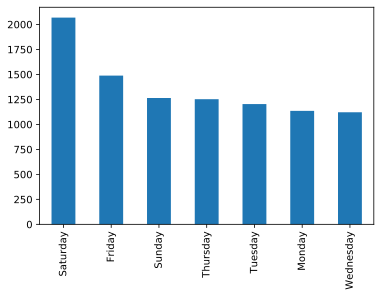

In [43]:
bread_group.day.value_counts().plot(kind='bar');

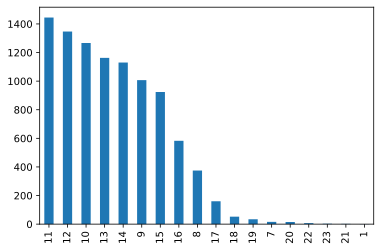

In [44]:
bread_group.hour.value_counts().plot.bar();

In [47]:
bread_dummy=pd.get_dummies(data=bread_group, columns=['day']).drop('Datetime', axis=1)
bread_dummy.head()

beverage  other  kids  snacks  bread  breakfast_pastry  dessert  \
Transaction                                                                    
1                   0      0     0       0      1                 0        0   
2                   0      0     0       0      2                 0        0   
3                   1      0     0       0      0                 0        1   
4                   0      0     0       0      0                 1        0   
5                   1      0     0       0      1                 1        0   

             condiments  breakfast  lunch  hour  day_Friday  day_Monday  \
Transaction                                                               
1                     0          0      0     9           0           0   
2                     0          0      0    10           0           0   
3                     1          0      0    10           0           0   
4                     0          0      0    10           0           0   
5                     0          0      0    10           0           0   

             day_Saturday  day_Sunday  day_Thursday  day_Tuesday  \
Transaction                                                        
1                       0           1             0            0   
2                       0           1             0            0   
3                       0           1             0            0   
4                       0           1             0            0   
5                       0           1             0            0   

             day_Wednesday  
Transaction                 
1                        0  
2                        0  
3                        0  
4                        0  
5                        0

In [48]:
# PCA

from sklearn.decomposition import PCA

In [49]:
pca=PCA(n_components=4).fit_transform(bread_dummy)

pc_df=pd.DataFrame(pca, columns=[f'pc_{i+1}' for i in range(4)])

pc_df.head()

pc_1      pc_2      pc_3      pc_4
0  3.197022 -0.925271  0.243811  0.005067
1  2.227490 -1.272567  1.182276 -0.163725
2  2.107261  0.426310 -0.220285  0.880673
3  2.198567 -0.579301 -0.795211 -0.027810
4  2.206414  0.039266  0.431598 -0.335133

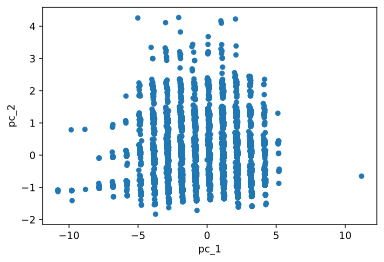

In [50]:
pc_df.plot.scatter(x='pc_1', y='pc_2');

In [51]:
# t-SNE

from sklearn.manifold import TSNE

tsne=TSNE(n_components=2, perplexity=15)

emb=tsne.fit_transform(bread_dummy)

embbeding=pd.DataFrame(emb, columns=['emb_1', 'emb_2'])

embbeding.head()

emb_1      emb_2
0  17.249821  84.771652
1   9.085863  93.297905
2  16.077995  67.256966
3   4.446727  85.165291
4   7.275518  77.868538

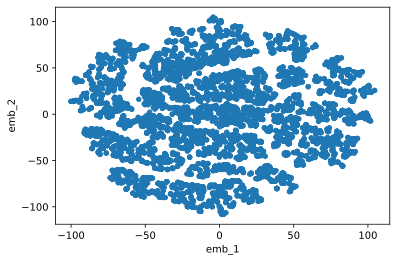

In [52]:
embbeding.plot.scatter(x='emb_1', y='emb_2')

In [53]:
# UMAP

import warnings
warnings.simplefilter('ignore')

from umap import UMAP

In [54]:
umap=UMAP(n_components=2).fit_transform(bread_dummy)

umap_df=pd.DataFrame(umap, columns=['umap_1', 'umap_2'])

umap_df.head()

umap_1    umap_2
0  20.722952  2.284268
1  21.421688  2.239706
2  21.515852  0.902537
3  21.608919  1.401443
4  21.475254  1.701858

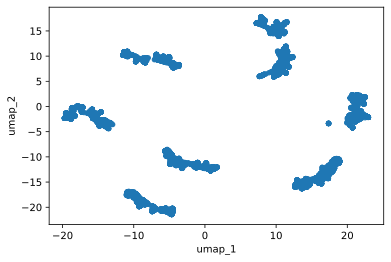

In [55]:
umap_df.plot.scatter(x='umap_1', y='umap_2');

In [56]:
# Clustering

# K-Means

from sklearn.cluster import KMeans

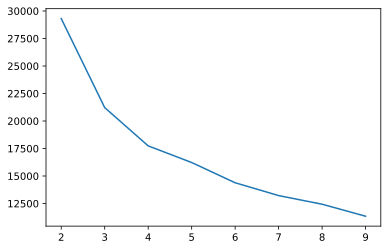

In [57]:
inercia=[]

for i in range(2, 10):
    kmeans=KMeans(n_clusters=i).fit(pc_df)
    inercia.append(kmeans.inertia_)
plt.plot(range(2,10), inercia);

In [58]:
kmeans=KMeans(n_clusters=3).fit(pc_df)

In [59]:
kmeans.cluster_centers_

array([[-2.92222674e+00,  6.78864663e-04,  1.70236190e-02,
         6.18965128e-03],
       [ 2.84923792e+00, -9.75018502e-03, -1.95442280e-03,
        -7.90902827e-05],
       [ 2.29484577e-01,  6.07294490e-03, -1.12081517e-02,
        -4.50089268e-03]])

In [60]:
bread_group['label']=kmeans.predict(pc_df)
bread_group.head()

Datetime  beverage  other  kids  snacks  bread  \
Transaction                                                             
1           2016-10-30 09:58:11         0      0     0       0      1   
2           2016-10-30 10:05:34         0      0     0       0      2   
3           2016-10-30 10:07:57         1      0     0       0      0   
4           2016-10-30 10:08:41         0      0     0       0      0   
5           2016-10-30 10:13:03         1      0     0       0      1   

             breakfast_pastry  dessert  condiments  breakfast  lunch     day  \
Transaction                                                                    
1                           0        0           0          0      0  Sunday   
2                           0        0           0          0      0  Sunday   
3                           0        1           1          0      0  Sunday   
4                           1        0           0          0      0  Sunday   
5                           1        0           0          0      0  Sunday   

             hour  label  
Transaction               
1               9      1  
2              10      1  
3              10      1  
4              10      1  
5              10      1

In [61]:
bread_merge=breadbasket.merge(bread_group.reset_index()[['label', 'Transaction']],
                              on='Transaction', how='left')

bread_merge.head()

Date      Time  Transaction           Item            Datetime  \
0  2016-10-30  09:58:11            1          Bread 2016-10-30 09:58:11   
1  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34   
2  2016-10-30  10:05:34            2   Scandinavian 2016-10-30 10:05:34   
3  2016-10-30  10:07:57            3  Hot chocolate 2016-10-30 10:07:57   
4  2016-10-30  10:07:57            3            Jam 2016-10-30 10:07:57   

   beverage  other  kids  snacks  bread  breakfast_pastry  dessert  \
0         0      0     0       0      1                 0        0   
1         0      0     0       0      1                 0        0   
2         0      0     0       0      1                 0        0   
3         1      0     0       0      0                 0        0   
4         0      0     0       0      0                 0        0   

   condiments  breakfast  lunch  label  
0           0          0      0      1  
1           0          0      0      1  
2           0          0      0      1  
3           0          0      0      1  
4           1          0      0      1

In [62]:
bread_merge.label.value_counts()

2    9013
0    6777
1    5503
Name: label, dtype: int64

In [63]:
# clusters transacciones por hora

cm=sns.light_palette('green', as_cmap=True)

pd.crosstab(bread_group.hour, bread_group.label).style.background_gradient(cmap=cm)

In [64]:
# por dia

pd.crosstab(bread_group.day, bread_group.label).style.background_gradient(cmap=cm)

In [65]:
# DBSCAN

from sklearn.cluster import DBSCAN

In [68]:
dbscan=DBSCAN()

bread_group['label']=dbscan.fit_predict(umap_df)

bread_merge=breadbasket.merge(bread_group.reset_index()[['label', 'Transaction']],
                              on='Transaction', how='left')

pd.crosstab(bread_group.hour, bread_group.label).style.background_gradient(cmap=cm)

In [69]:
pd.crosstab(bread_group.day, bread_group.label).style.background_gradient(cmap=cm)

In [71]:
# HDBSCAN

from hdbscan import HDBSCAN

hdbscan=HDBSCAN(min_cluster_size=25)

bread_group['label']=hdbscan.fit_predict(umap_df)

bread_merge=breadbasket.merge(bread_group.reset_index()[['label', 'Transaction']],
                              on='Transaction', how='left')

pd.crosstab(bread_group.hour, bread_group.label).style.background_gradient(cmap=cm)

In [72]:
pd.crosstab(bread_group.day, bread_group.label).style.background_gradient(cmap=cm)

In [73]:
# GMM

from sklearn.mixture import GaussianMixture as GMM

In [75]:
gm=GMM(n_components=4, covariance_type='full')


bread_group['label']=gm.fit_predict(pc_df)

bread_merge=breadbasket.merge(bread_group.reset_index()[['label', 'Transaction']],
                              on='Transaction', how='left')

pd.crosstab(bread_group.hour, bread_group.label).style.background_gradient(cmap=cm)

In [76]:
pd.crosstab(bread_group.day, bread_group.label).style.background_gradient(cmap=cm)

In [78]:
bread_group[bread_group.label==0]

Datetime  beverage  other  kids  snacks  bread  \
Transaction                                                             
3           2016-10-30 10:07:57         1      0     0       0      0   
12          2016-10-30 10:30:14         2      0     0       0      0   
26          2016-10-30 10:56:08         0      0     0       0      0   
40          2016-10-30 11:55:51         2      1     0       0      0   
43          2016-10-30 12:00:22         0      0     0       0      1   
50          2016-10-30 12:25:11         0      0     0       0      1   
58          2016-10-30 12:59:29         2      0     0       0      0   
60          2016-10-30 13:14:04         3      0     0       0      0   
64          2016-10-30 13:34:07         0      0     0       0      0   
65          2016-10-30 13:37:25         2      1     0       1      0   
69          2016-10-30 13:51:49         1      0     0       0      1   
70          2016-10-30 13:54:42         0      0     0       0      0   
78          2016-10-30 14:42:29         0      0     0       0      0   
79          2016-10-30 14:45:44         2      0     0       0      0   
81          2016-10-31 08:28:31         1      0     0       0      0   
82          2016-10-31 08:47:05         0      1     0       0      1   
105         2016-10-31 10:21:29         2      1     0       0      0   
113         2016-10-31 11:02:37         1      0     0       0      0   
122         2016-10-31 11:37:30         0      0     0       0      0   
128         2016-10-31 11:55:00         2      1     0       0      0   
129         2016-10-31 11:59:23         2      0     0       0      0   
132         2016-10-31 12:14:20         2      0     0       1      0   
140         2016-10-31 12:53:33         2      0     0       0      0   
147         2016-10-31 13:09:31         1      0     0       0      0   
148         2016-10-31 13:21:17         2      0     0       0      0   
153         2016-10-31 13:55:22         2      0     0       0      0   
159         2016-10-31 14:22:31         1      0     0       0      1   
176         2016-10-31 18:22:24         1      0     0       0      0   
185         2016-11-01 09:29:25         1      0     0       0      0   
198         2016-11-01 11:11:58         1      0     0       0      0   
...                         ...       ...    ...   ...     ...    ...   
9518        2017-04-07 10:58:06         1      0     0       0      0   
9536        2017-04-07 14:04:11         0      0     0       0      0   
9542        2017-04-07 15:23:37         0      0     0       0      0   
9543        2017-04-07 15:26:07         0      0     0       0      1   
9548        2017-04-07 16:29:52         2      0     0       0      0   
9558        2017-04-08 09:09:47         0      0     0       0      0   
9559        2017-04-08 09:10:47         2      0     0       0      0   
9580        2017-04-08 10:48:43         1      1     0       0      0   
9584        2017-04-08 11:04:46         1      0     0       0      0   
9585        2017-04-08 11:07:38         1      0     0       0      0   
9586        2017-04-08 11:27:08         0      1     0       0      2   
9587        2017-04-08 11:28:11         1      0     0       0      0   
9588        2017-04-08 11:39:13         1      0     0       0      1   
9593        2017-04-08 12:14:40         0      0     0       0      0   
9601        2017-04-08 13:12:32         2      0     0       0      1   
9603        2017-04-08 13:21:07         0      0     0       0      0   
9609        2017-04-08 14:24:42         2      0     0       0      0   
9616        2017-04-08 15:00:50         2      0     0       0      0   
9627        2017-04-08 16:05:07         3      0     0       0      1   
9628        2017-04-08 16:06:48         2      0     0       0      0   
9629        2017-04-08 16:14:28         1      0     0       0      0   
9630        2017-04-08 16:16:03         1      0     0       0      0   
9631    

In [83]:
bread_group[bread_group.label==3].describe()

beverage        other         kids       snacks        bread  \
count  4964.000000  4964.000000  4964.000000  4964.000000  4964.000000   
mean      0.631547     0.074940     0.003828     0.004835     0.465351   
std       0.633713     0.265606     0.061755     0.069371     0.558675   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     0.000000     0.000000     1.000000   
max       2.000000     2.000000     1.000000     1.000000     2.000000   

       breakfast_pastry  dessert   condiments    breakfast        lunch  \
count            4964.0   4964.0  4964.000000  4964.000000  4964.000000   
mean                0.0      0.0     0.022965     0.015915     0.110596   
std                 0.0      0.0     0.156389     0.125158     0.332982   
min                 0.0      0.0     0.000000     0.000000     0.000000   
25%                 0.0      0.0     0.000000     0.000000     0.000000   
50%                 0.0      0.0     0.000000     0.000000     0.000000   
75%                 0.0      0.0     0.000000     0.000000     0.000000   
max                 0.0      0.0     2.000000     1.000000     2.000000   

              hour   label  
count  4964.000000  4964.0  
mean     12.039887     3.0  
std       2.428759     0.0  
min       1.000000     3.0  
25%      10.000000     3.0  
50%      12.000000     3.0  
75%      14.000000     3.0  
max      23.000000     3.0

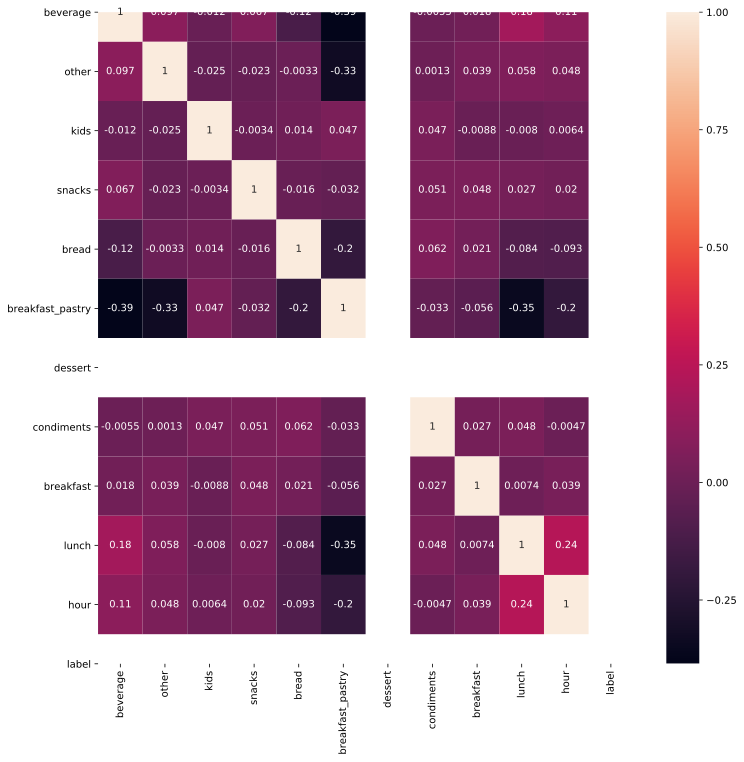

In [91]:
plt.figure(figsize=(12,12))
sns.heatmap(bread_group[bread_group.label==2].corr(), annot=True);

In [92]:
bread_group[bread_group.label==2]

Datetime  beverage  other  kids  snacks  bread  \
Transaction                                                             
4           2016-10-30 10:08:41         0      0     0       0      0   
5           2016-10-30 10:13:03         1      0     0       0      1   
6           2016-10-30 10:16:55         0      0     0       0      0   
7           2016-10-30 10:19:12         2      0     0       0      0   
8           2016-10-30 10:20:51         0      0     0       0      1   
9           2016-10-30 10:21:59         0      0     0       0      1   
10          2016-10-30 10:25:58         0      0     0       0      1   
11          2016-10-30 10:27:21         0      1     0       0      2   
14          2016-10-30 10:32:46         0      0     0       0      1   
15          2016-10-30 10:34:36         1      2     0       0      1   
16          2016-10-30 10:37:08         1      0     0       0      1   
20          2016-10-30 10:45:22         0      0     0       0      1   
21          2016-10-30 10:49:29         2      0     0       0      1   
23          2016-10-30 10:53:49         0      0     0       0      1   
32          2016-10-30 11:16:15         0      0     0       0      1   
34          2016-10-30 11:25:45         1      0     0       0      0   
35          2016-10-30 11:27:34         0      0     0       0      1   
44          2016-10-30 12:05:47         1      0     0       0      0   
45          2016-10-30 12:08:36         2      0     0       0      0   
47          2016-10-30 12:15:29         1      0     1       0      1   
49          2016-10-30 12:23:01         2      0     0       0      0   
62          2016-10-30 13:24:00         3      0     0       1      0   
67          2016-10-30 13:46:48         1      1     0       0      0   
68          2016-10-30 13:49:36         2      0     0       0      1   
71          2016-10-30 13:56:08         0      0     0       0      0   
85          2016-10-31 09:10:09         2      0     0       0      0   
91          2016-10-31 09:22:48         1      1     0       0      0   
95          2016-10-31 09:43:37         1      0     0       0      0   
96          2016-10-31 09:46:48         2      0     0       0      0   
97          2016-10-31 09:51:11         2      0     0       0      0   
...                         ...       ...    ...   ...     ...    ...   
9519        2017-04-07 10:58:47         2      0     0       0      0   
9529        2017-04-07 13:06:01         3      1     0       0      0   
9533        2017-04-07 13:39:11         2      0     0       0      2   
9545        2017-04-07 15:44:15         1      0     0       0      0   
9546        2017-04-07 15:56:41         1      0     0       0      0   
9550        2017-04-07 17:30:07         0      1     0       0      0   
9551        2017-04-08 08:23:46         0      0     0       0      1   
9561        2017-04-08 09:19:34         0      0     0       0      1   
9563        2017-04-08 09:24:50         1      0     0       0      1   
9565        2017-04-08 09:25:49         0      0     0       0      0   
9567        2017-04-08 09:48:32         0      0     0       0      3   
9568        2017-04-08 09:55:58         1      0     0       0      1   
9571        2017-04-08 10:21:21         1      0     0       0      0   
9575        2017-04-08 10:35:37         1      0     0       0      0   
9576        2017-04-08 10:36:49         1      0     0       0      2   
9578        2017-04-08 10:43:56         1      1     0       0      0   
9579        2017-04-08 10:44:44         1      2     0       0      0   
9582        2017-04-08 10:51:11         0      0     0       0      0   
9590        2017-04-08 11:54:22         3      1     0       0      0   
9599        2017-04-08 12:58:25         2      1     0       0      0   
9604        2017-04-08 13:32:04         2      0     0       0      0   
9611        2017-04-08 14:37:12         1      0     0       0      0   
9617    

In [93]:
breadbasket

Date      Time  Transaction                  Item  \
0      2016-10-30  09:58:11            1                 Bread   
1      2016-10-30  10:05:34            2          Scandinavian   
2      2016-10-30  10:05:34            2          Scandinavian   
3      2016-10-30  10:07:57            3         Hot chocolate   
4      2016-10-30  10:07:57            3                   Jam   
5      2016-10-30  10:07:57            3               Cookies   
6      2016-10-30  10:08:41            4                Muffin   
7      2016-10-30  10:13:03            5                Coffee   
8      2016-10-30  10:13:03            5                Pastry   
9      2016-10-30  10:13:03            5                 Bread   
10     2016-10-30  10:16:55            6             Medialuna   
11     2016-10-30  10:16:55            6                Pastry   
12     2016-10-30  10:16:55            6                Muffin   
13     2016-10-30  10:19:12            7             Medialuna   
14     2016-10-30  10:19:12            7                Pastry   
15     2016-10-30  10:19:12            7                Coffee   
16     2016-10-30  10:19:12            7                   Tea   
17     2016-10-30  10:20:51            8                Pastry   
18     2016-10-30  10:20:51            8                 Bread   
19     2016-10-30  10:21:59            9                 Bread   
20     2016-10-30  10:21:59            9                Muffin   
21     2016-10-30  10:25:58           10          Scandinavian   
22     2016-10-30  10:25:58           10             Medialuna   
23     2016-10-30  10:27:21           11                 Bread   
24     2016-10-30  10:27:21           11             Medialuna   
25     2016-10-30  10:27:21           11                 Bread   
26     2016-10-30  10:27:21           11                  NONE   
27     2016-10-30  10:30:14           12                   Jam   
28     2016-10-30  10:30:14           12                Coffee   
29     2016-10-30  10:30:14           12               Tartine   
...           ...       ...          ...                   ...   
21263  2017-04-09  12:28:01         9671                 Bread   
21264  2017-04-09  12:31:28         9672                Coffee   
21265  2017-04-09  12:31:28         9672               Cookies   
21266  2017-04-09  12:31:28         9672                  NONE   
21267  2017-04-09  12:31:28         9672  Extra Salami or Feta   
21268  2017-04-09  12:32:03         9673        Spanish Brunch   
21269  2017-04-09  12:32:03         9673                Coffee   
21270  2017-04-09  12:32:03         9673                 Bread   
21271  2017-04-09  13:04:08         9674                Coffee   
21272  2017-04-09  13:06:34         9676             Smoothies   
21273  2017-04-09  13:06:34         9676              Sandwich   
21274  2017-04-09  13:20:23         9677          Tacos/Fajita   
21275  2017-04-09  13:20:23         9677                  Coke   
21276  2017-04-09  13:49:21         9678                Coffee   
21277  2017-04-09  13:49:21         9678          Tacos/Fajita   
21278  2017-04-09  13:49:21         9678                 Toast   
21279  2017-04-09  14:08:37         9679                 Bread   
21280  2017-04-09  14:08:37         9679        Spanish Brunch   
21281  2017-04-09  14:24:03         9680                 Bread   
21282  2017-04-09  14:30:09         9681              Truffles   
21283  2017-04-09  14:30:09         9681                   Tea   
21284  2017-04-09  14:30:09         9681        Spanish Brunch   
21285  2017-04-09  14:30:09         9681      Christmas common   
21286  2017-04-09  14:32:58         9682                Muffin   
21287  2017-04-09  14:32:58         9682          Tacos/Fajita   
21288  2017-04-09  14:32:58         9682                Coffee   
21289  2017-04-09  14:32:58         9682                   Tea   
21290  2017-04-09  14:57:06         9683                Coffee   
21291  2017-04-09  14:57:06         9683             